In [120]:
#this project by me , Ishaan predicts that whether a person has a heart disease or not

In [121]:
# importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns


In [122]:
#loading the files
from google.colab import files
uploaded = files.upload()

Saving preprocessed_data.csv to preprocessed_data.csv


In [126]:
#Store the data into a variable
df = pd.read_csv("preprocessed_data.csv")

#get the last 7
df.tail(7)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,bmi,bp
69000,55,0,172,70.0,130,90,0,0,1,1,1,0,0,1,0,0,23.661439,2.0
69001,59,0,165,80.0,150,80,0,0,1,1,1,0,0,1,0,0,29.384757,2.0
69002,54,1,168,76.0,120,80,1,0,1,0,1,0,0,1,0,0,26.927438,1.0
69003,63,0,158,126.0,140,90,0,0,1,1,0,1,0,0,1,0,50.472681,2.0
69004,53,1,183,105.0,180,90,0,1,0,1,0,0,1,1,0,0,31.353579,2.0
69005,63,0,163,72.0,135,80,0,0,0,1,1,0,0,0,1,0,27.099251,2.0
69006,57,0,170,72.0,120,80,0,0,1,0,0,1,0,1,0,0,24.913495,1.0


In [127]:
# print the shape of data
df.shape

(69007, 18)

In [128]:
# data cleaning phase
# first find nan or empty values
df.isna().sum()

age              0
gender           0
height           0
weight           0
ap_hi            0
ap_lo            0
smoke            0
alco             0
active           0
cardio           0
cholesterol_1    0
cholesterol_2    0
cholesterol_3    0
gluc_1           0
gluc_2           0
gluc_3           0
bmi              0
bp               7
dtype: int64

In [132]:
# Another way to check for any null or missing values
df.isnull().any()

age              False
gender           False
height           False
weight           False
ap_hi            False
ap_lo            False
smoke            False
alco             False
active           False
cardio           False
cholesterol_1    False
cholesterol_2    False
cholesterol_3    False
gluc_1           False
gluc_2           False
gluc_3           False
bmi              False
bp               False
dtype: bool

In [130]:
df = df.dropna()

In [131]:
# basic stats
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,bmi,bp
count,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000
mean,54.174333,0.348710,164.359797,74.118572,126.320884,81.331783,0.087870,0.053594,0.803290,0.494884,0.750130,0.135362,0.114507,0.850203,0.073739,0.076058,27.524546,1.213014
std,6.938749,0.476565,8.204222,14.328335,17.713265,9.889621,0.283107,0.225217,0.397514,0.499977,0.432941,0.342113,0.318429,0.356875,0.261348,0.265093,6.080675,0.738267
min,30.000000,0.000000,55.000000,11.000000,7.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.471784,0.000000
25%,49.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,23.875115,1.000000
50%,55.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,26.346494,1.000000
75%,59.000000,1.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,30.119376,2.000000
max,66.000000,1.000000,250.000000,200.000000,240.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298.666667,2.000000


In [133]:
#get count of people with cardiovascular disease
df[df['cardio']==0]

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,bmi,bp
0,51,1,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0,21.967120,0.0
4,49,0,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0,23.011177,0.0
5,61,0,151,67.0,120,80,0,0,0,0,0,1,0,0,1,0,29.384676,1.0
6,62,0,157,93.0,130,80,0,0,1,0,0,0,1,1,0,0,37.729725,2.0
8,49,0,158,71.0,110,70,0,0,1,0,1,0,0,1,0,0,28.440955,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68994,52,0,151,49.0,120,80,0,0,1,0,1,0,0,1,0,0,21.490286,1.0
68995,61,0,160,59.0,110,70,0,0,1,0,1,0,0,1,0,0,23.046875,0.0
68998,57,0,159,72.0,130,90,0,0,1,0,0,1,0,0,1,0,28.479886,2.0
69002,54,1,168,76.0,120,80,1,0,1,0,1,0,0,1,0,0,26.927438,1.0


In [134]:
# get the count of people with healthy heart
df[df['cardio']==1]

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,bmi,bp
1,56,0,156,85.0,140,90,0,0,1,1,0,0,1,1,0,0,34.927679,2.0
2,52,0,165,64.0,130,70,0,0,0,1,0,0,1,1,0,0,23.507805,2.0
3,49,1,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0,28.710479,2.0
7,63,1,178,95.0,130,90,0,0,1,1,0,0,1,0,0,1,29.983588,2.0
15,47,1,172,112.0,120,80,0,0,0,1,1,0,0,1,0,0,37.858302,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69000,55,0,172,70.0,130,90,0,0,1,1,1,0,0,1,0,0,23.661439,2.0
69001,59,0,165,80.0,150,80,0,0,1,1,1,0,0,1,0,0,29.384757,2.0
69003,63,0,158,126.0,140,90,0,0,1,1,0,1,0,0,1,0,50.472681,2.0
69004,53,1,183,105.0,180,90,0,1,0,1,0,0,1,1,0,0,31.353579,2.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


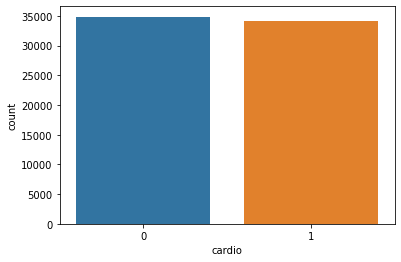

In [135]:
#visualize the count
sns.countplot(df['cardio'])

In [136]:
# age is in days we convert into days
df['years'] = (df['age']/365).round(0)
df

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,bmi,bp,years
0,51,1,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0,21.967120,0.0,0.0
1,56,0,156,85.0,140,90,0,0,1,1,0,0,1,1,0,0,34.927679,2.0,0.0
2,52,0,165,64.0,130,70,0,0,0,1,0,0,1,1,0,0,23.507805,2.0,0.0
3,49,1,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0,28.710479,2.0,0.0
4,49,0,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0,23.011177,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69002,54,1,168,76.0,120,80,1,0,1,0,1,0,0,1,0,0,26.927438,1.0,0.0
69003,63,0,158,126.0,140,90,0,0,1,1,0,1,0,0,1,0,50.472681,2.0,0.0
69004,53,1,183,105.0,180,90,0,1,0,1,0,0,1,1,0,0,31.353579,2.0,0.0
69005,63,0,163,72.0,135,80,0,0,0,1,1,0,0,0,1,0,27.099251,2.0,0.0


In [137]:
df['years'] = pd.to_numeric(df['years'],downcast='integer')

In [138]:
type(df['years'])

pandas.core.series.Series

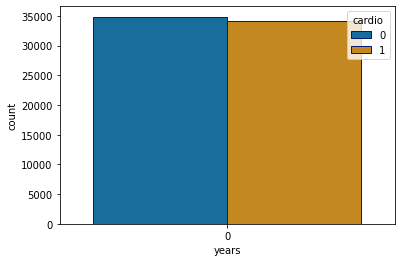

In [139]:
# visualize the data
sns.countplot(x='years',hue ='cardio',data = df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

In [140]:
#get the correlation of the colums
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,bmi,bp,years
age,1.000000,-0.023017,-0.080723,0.055022,0.197307,0.150216,-0.047882,-0.029396,-0.010177,0.239125,-0.130527,0.022368,0.153435,-0.088155,0.024839,0.094188,0.086095,0.228609,NaN
gender,-0.023017,1.000000,0.498006,0.155970,0.058269,0.064764,0.338670,0.171013,0.005512,0.007518,0.035832,-0.017863,-0.029526,0.018770,-0.005380,-0.019965,-0.095911,0.064370,NaN
height,-0.080723,0.498006,1.000000,0.291528,0.017598,0.035749,0.187958,0.094465,-0.007295,-0.010391,0.049165,-0.024282,-0.040757,0.019527,-0.012800,-0.013669,-0.292322,0.029514,NaN
weight,0.055022,0.155970,0.291528,1.000000,0.255077,0.244908,0.066781,0.067933,-0.017979,0.179980,-0.136789,0.067126,0.113861,-0.120407,0.094930,0.068506,0.759508,0.265152,NaN
ap_hi,0.197307,0.058269,0.017598,0.255077,1.000000,0.646380,0.028107,0.031564,0.000631,0.401161,-0.183284,0.094279,0.147904,-0.096967,0.072314,0.059248,0.216872,0.813074,NaN
ap_lo,0.150216,0.064764,0.035749,0.244908,0.646380,1.000000,0.024621,0.042920,-0.001057,0.328063,-0.150121,0.071884,0.126876,-0.083301,0.061209,0.051798,0.199783,0.622923,NaN
smoke,-0.047882,0.338670,0.187958,0.066781,0.028107,0.024621,1.000000,0.340286,0.025712,-0.016329,-0.017387,0.024435,-0.002614,-0.001116,0.015459,-0.013738,-0.028151,0.026939,NaN
alco,-0.029396,0.171013,0.094465,0.067933,0.031564,0.042920,0.340286,1.000000,0.025324,-0.008119,-0.043251,0.038829,0.017087,-0.020205,0.030609,-0.002977,0.014850,0.029137,NaN
active,-0.010177,0.005512,-0.007295,-0.017979,0.000631,-0.001057,0.025712,0.025324,1.000000,-0.037258,-0.005009,-0.005086,0.012275,0.010196,-0.010901,-0.002980,-0.014813,-0.007741,NaN
cardio,0.239125,0.007518,-0.010391,0.179980,0.401161,0.328063,-0.016329,-0.008119,-0.037258,1.000000,-0.205329,0.080475,0.192708,-0.091287,0.052909,0.070731,0.163582,0.417657,NaN


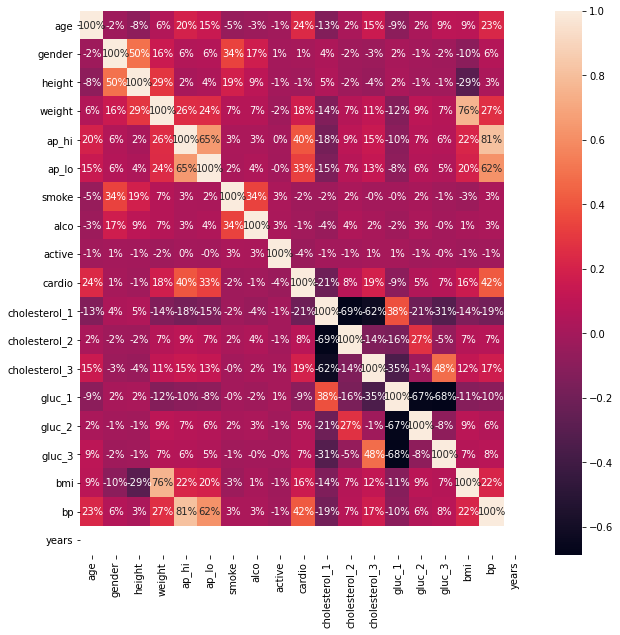

In [141]:
# visulaize the correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [142]:
df = df.drop('years',axis = 1)

In [144]:
df = df.drop('gender',axis = 1)

In [145]:
# Split the data into feature and target data 
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [146]:
#now splitting into trainng and testing data sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 2)

In [147]:
#Feature scaling
# scale the values 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [151]:
#Use random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5,criterion='entropy',random_state = 3)
forest.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [152]:
#Test the models on training and testing dataset
model = forest
model.score(X_train,Y_train)

0.994927536231884

In [153]:
model.score(X_test,Y_test)

0.9110507246376811

In [154]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,model.predict(X_test))

In [157]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(criterion='gini')
decisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [159]:
model.score(X_test,Y_test)

0.9110507246376811